<h1> <center>Predicting satisfaction of Airlines Passenger</center></h1>

In [1]:
# Importing packages
import numpy as np            # Implemennts milti-dimensional array and matrices
import pandas as pd           # For data manipulation and analysis

# for Visualisation
import matplotlib.pyplot as plt                                   
# Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                       
# Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
train_data = pd.read_csv('cust_train.csv')
train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,3,5,0,5,5,4,5,3,4,4,5,0,0.0,neutral or dissatisfied
1,54504,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,1,5,3,2,2,2,2,2,3,2,3,47,29.0,neutral or dissatisfied
2,13387,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,4,1,0,1,1,5,5,2,3,2,1,0,0.0,satisfied
3,17388,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,2,3,4,5,5,5,5,5,4,5,5,10,2.0,satisfied
4,91598,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,2,2,4,2,2,4,3,5,3,5,2,0,0.0,satisfied


In [3]:
train_data.shape

(83123, 24)

In [4]:
train_data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
test_data = pd.read_csv('cust_test.csv')
test_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,3,5,5,5,5,4,3,3,5,5,5,0,0.0
1,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,5,1,1,1,1,4,3,3,1,4,1,17,17.0
2,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,3,1,2,1,1,5,4,4,5,5,1,0,0.0
3,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,1,3,1,1,3,2,5,5,3,1,3,0,0.0
4,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,3,5,0,5,5,3,5,4,3,5,5,0,0.0


In [6]:
test_data.shape

(20781, 23)

In [7]:
data = train_data.copy()
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,3,5,0,5,5,4,5,3,4,4,5,0,0.0,neutral or dissatisfied
1,54504,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,1,5,3,2,2,2,2,2,3,2,3,47,29.0,neutral or dissatisfied
2,13387,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,4,1,0,1,1,5,5,2,3,2,1,0,0.0,satisfied
3,17388,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,2,3,4,5,5,5,5,5,4,5,5,10,2.0,satisfied
4,91598,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,2,2,4,2,2,4,3,5,3,5,2,0,0.0,satisfied


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

In [9]:
data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             251
satisfaction                           0
dtype: int64

In [10]:
data['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [11]:
data['Age'].max()

85

## Total count of int & float in the data sets

In [12]:
x = data.dtypes[data.dtypes.map(lambda data: data=='int64')].value_counts();
y = int(data.dtypes[data.dtypes.map(lambda data: data=='float64')].value_counts());
print("Total count of int & float is : ",x+y)

Total count of int & float is :  int64    19
dtype: int64


### Handling columns i.e replacing the space with underscore and drop unnamed row and id columns

In [13]:
data.drop('id',axis=1,inplace= True)

In [14]:
data.columns = (col.replace(' ','_') for col in data.columns)
data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,3,5,0,5,5,4,5,3,4,4,5,0,0.0,neutral or dissatisfied
1,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,1,5,3,2,2,2,2,2,3,2,3,47,29.0,neutral or dissatisfied
2,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,4,1,0,1,1,5,5,2,3,2,1,0,0.0,satisfied
3,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,2,3,4,5,5,5,5,5,4,5,5,10,2.0,satisfied
4,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,2,2,4,2,2,4,3,5,3,5,2,0,0.0,satisfied


In [15]:
test_data.columns = (col.replace(' ','_') for col in test_data.columns)
test_data.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,3,5,5,5,5,4,3,3,5,5,5,0,0.0
1,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,5,1,1,1,1,4,3,3,1,4,1,17,17.0
2,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,3,1,2,1,1,5,4,4,5,5,1,0,0.0
3,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,1,3,1,1,3,2,5,5,3,1,3,0,0.0
4,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,3,5,0,5,5,3,5,4,3,5,5,0,0.0


In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 20781 non-null  int64  
 1   Gender                             20781 non-null  object 
 2   Customer_Type                      20781 non-null  object 
 3   Age                                20781 non-null  int64  
 4   Type_of_Travel                     20781 non-null  object 
 5   Class                              20781 non-null  object 
 6   Flight_Distance                    20781 non-null  int64  
 7   Inflight_wifi_service              20781 non-null  int64  
 8   Departure/Arrival_time_convenient  20781 non-null  int64  
 9   Ease_of_Online_booking             20781 non-null  int64  
 10  Gate_location                      20781 non-null  int64  
 11  Food_and_drink                     20781 non-null  int

In [17]:
test_data.drop('id',axis =1, inplace= True)

In [18]:
test_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,3,5,5,5,5,4,3,3,5,5,5,0,0.0
1,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,5,1,1,1,1,4,3,3,1,4,1,17,17.0
2,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,3,1,2,1,1,5,4,4,5,5,1,0,0.0
3,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,1,3,1,1,3,2,5,5,3,1,3,0,0.0
4,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,3,5,0,5,5,3,5,4,3,5,5,0,0.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             83123 non-null  object 
 1   Customer_Type                      83123 non-null  object 
 2   Age                                83123 non-null  int64  
 3   Type_of_Travel                     83123 non-null  object 
 4   Class                              83123 non-null  object 
 5   Flight_Distance                    83123 non-null  int64  
 6   Inflight_wifi_service              83123 non-null  int64  
 7   Departure/Arrival_time_convenient  83123 non-null  int64  
 8   Ease_of_Online_booking             83123 non-null  int64  
 9   Gate_location                      83123 non-null  int64  
 10  Food_and_drink                     83123 non-null  int64  
 11  Online_boarding                    83123 non-null  int

In [20]:
data['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [21]:
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [22]:
data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,3,5,0,5,5,4,5,3,4,4,5,0,0.0,0
1,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,1,5,3,2,2,2,2,2,3,2,3,47,29.0,0
2,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,4,1,0,1,1,5,5,2,3,2,1,0,0.0,1
3,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,2,3,4,5,5,5,5,5,4,5,5,10,2.0,1
4,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,2,2,4,2,2,4,3,5,3,5,2,0,0.0,1


## Check imbalance of datasets.wheather datasets is balance or imbalance ?

In [23]:
data.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

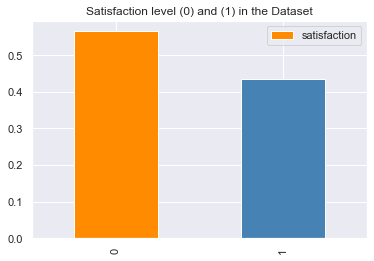

In [24]:
data['satisfaction'].value_counts(normalize= True).plot(kind='bar',color=['darkorange','steelblue'],legend= True)
plt.title('Satisfaction level (0) and (1) in the Dataset')
plt.show()

* 'Distribution Ratio is 55% : 45% between unstaisfied vs satisfied passenger. 
* Hence difference is only 10% so data is quite balance.
* 'There is no requirement of oversampling'

# Missing value treatment

In [25]:
# Total missing value
total = data.isnull().sum().sort_values(ascending= False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending= False)
missing_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head()

,total,percent
Arrival_Delay_in_Minutes,251,0.00302
satisfaction,0,0.00000
Food_and_drink,0,0.00000
Customer_Type,0,0.00000
Age,0,0.00000


### Filling the missing value with mean as it's continuous variable

In [26]:
# Filling the missing with mean
data['Arrival_Delay_in_Minutes'] = data['Arrival_Delay_in_Minutes'].fillna(data['Arrival_Delay_in_Minutes'].mean())

In [27]:
data.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [28]:
data.select_dtypes(include =['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

# EDA (Exploratory Data Analysis)

In [29]:
# import sweetviz as sv
# sweet_report = sv.analyze(data)
# sweet_report.show_html('sweet_report.html')

In [30]:
# import pandas as pd
# from pandas_profiling import ProfileReport
# design_report = ProfileReport(data)
# design_report.to_file(output_file='report.html')

## Q : What is gender wise satisfaction ?

<Figure size 864x720 with 0 Axes>

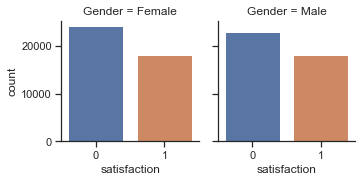

In [31]:
plt.figure(figsize=(12,10))
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=data, kind="count", height=2.5, aspect=1.0)
plt.show()

* **Gender** : satisfied and unsatisfied rate for both male and female are quite similar. 
* Unsatisfied guest > Satisfied guest for both Male and Female.

## Q : What is satisfaction rate vs customer_type ?

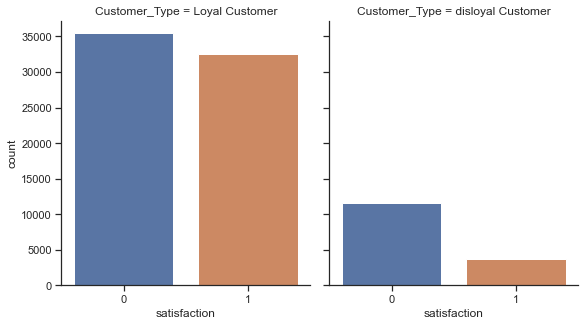

In [32]:
with sns.axes_style(style='ticks'):
     g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=data, kind="count",height = 4.5,aspect=0.9)

* More loyal customer than disloyal customer

## Q : What is satisfaction rate vs 'Type_of_Travel' and  'Class' ?

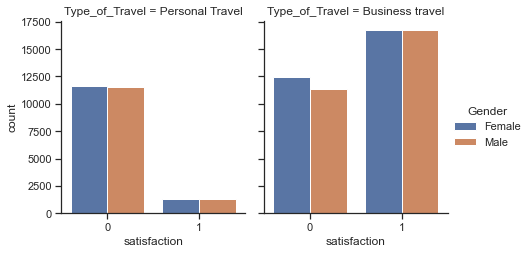

In [33]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('satisfaction',col='Type_of_Travel',data = data, kind= 'count',hue= 'Gender',height = 3.5,aspect=0.9)

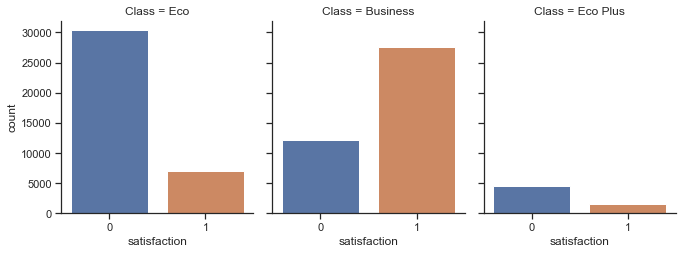

In [34]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('satisfaction',col='Class',data = data, kind= 'count',height = 3.5,aspect=0.9)

### Maximum unsatisfied customers are traveling in Economy class

## Q : Age wise customer satisfaction ?

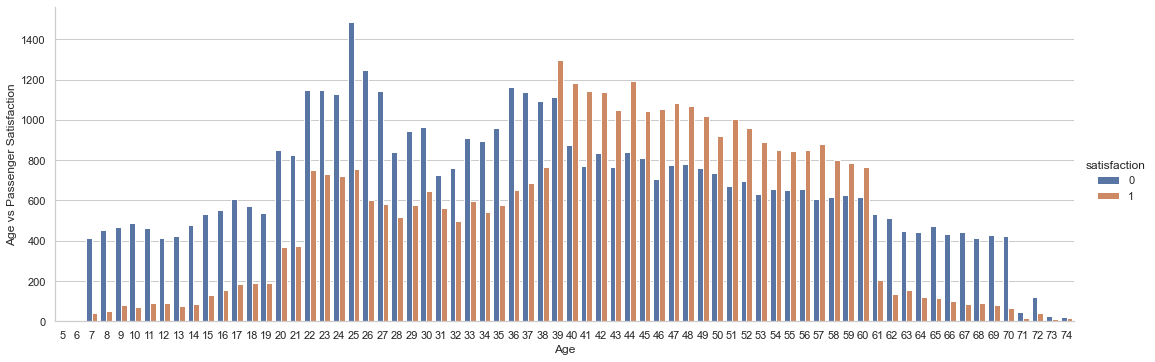

In [35]:
with sns.axes_style('whitegrid'):
    g = sns.catplot("Age", data=data, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 75))
g.set_ylabels('Age vs Passenger Satisfaction')

**Maximum unsatisfied customer between 7-38 and 61-70  but age between 39-60 years are highly satisfied**

## Q : How flight_distance ,type_of_travel and satisfaction is connected ?

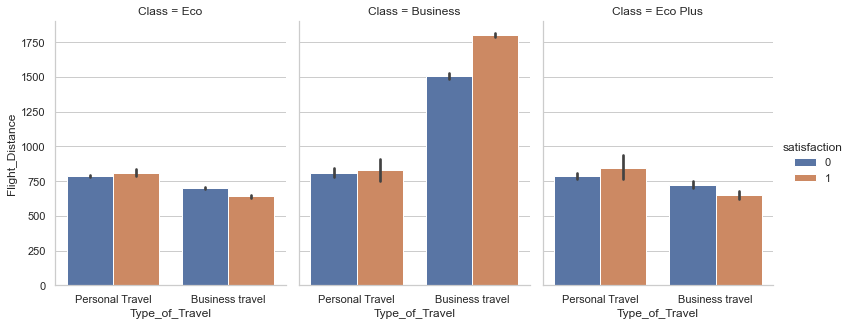

In [36]:
with sns.axes_style('whitegrid'):
    g = sns.catplot(x='Type_of_Travel',y ='Flight_Distance',data= data,hue= 'satisfaction',
                    col = 'Class',kind= 'bar',height = 4.5,aspect=0.8 )

## Q : Satisfaction with respect to Departure/Arrival time,online boarding and class

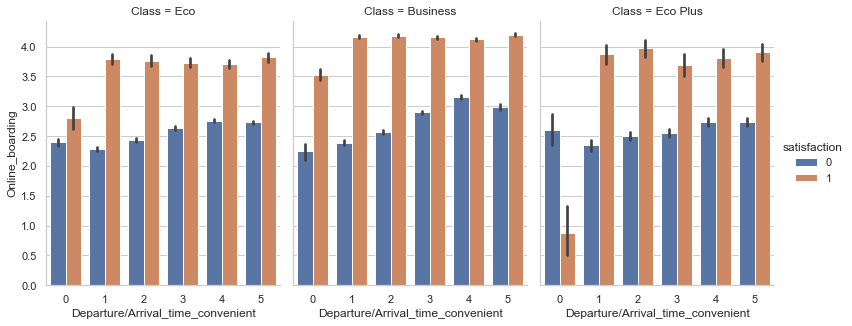

In [37]:
with sns.axes_style('whitegrid'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding",
                    hue="satisfaction", col="Class", data=data, kind="bar", height=4.5, aspect=.8)

**Economy plus class passenger are highly unsatisfied in comparison to Eco and Business**

## Q : How satisfaction is result of class of travel & departuere and arrival delay ?

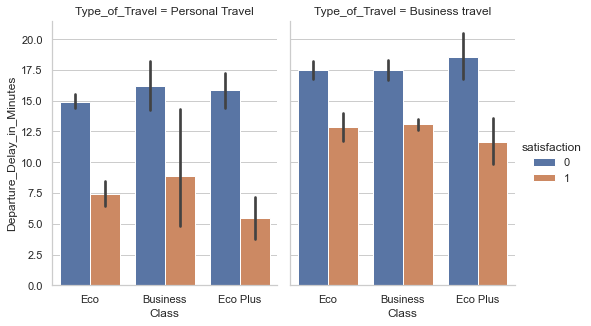

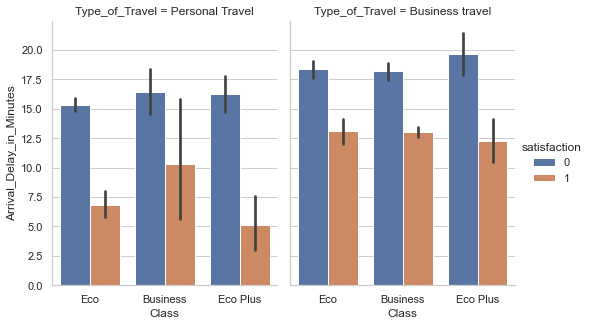

In [38]:
with sns.axes_style('whitegrid'):
    g = sns.catplot(x='Class',y = 'Departure_Delay_in_Minutes',hue = 'satisfaction',data= data, col="Type_of_Travel",
                    kind ='bar',height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", data=data,col="Type_of_Travel",
                    kind="bar",height=4.5, aspect=.8)

**By minute comparison, all combinations have higher no. of dissatisfied passengers compared to no. of satisfied passengers**

## Q: How satisfaction depends on 'Gate_location','Baggage_delay' groupby class ?

In [39]:
data.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

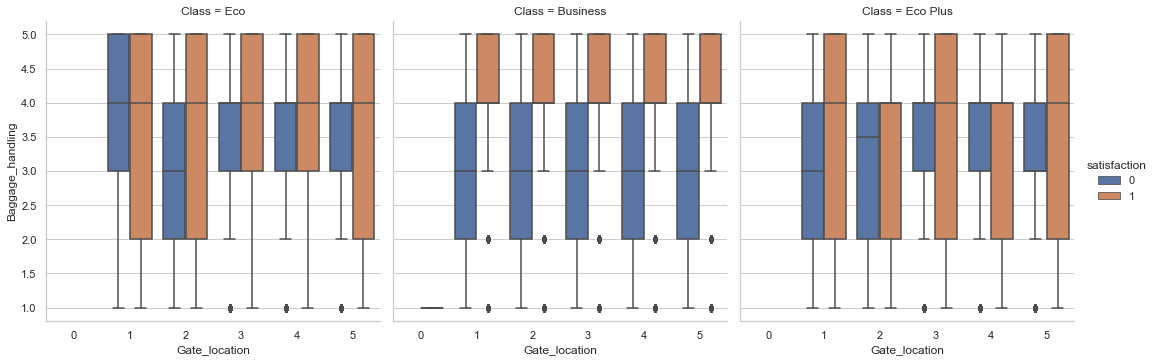

In [40]:
with sns.axes_style('whitegrid'):
    g = sns.catplot(x='Gate_location', y = 'Baggage_handling',hue ='satisfaction',col= 'Class',data=data,kind ='box')

**Baggage Handling, Gate Location grouped by Class**: For business class, it is observed that all gate locations have higher no. of dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4). For Eco Plus, when the gate location is 1 and for Eco, when the gate location is 2, even when the baggages are handled in a mediocre way (rating in range 2.0 - 4.0), passengers remained dissatisfied.

## Q: How satisfaction impacted by Inflight_wifi_service & Inflight_entertainment with groupby Çlass ?

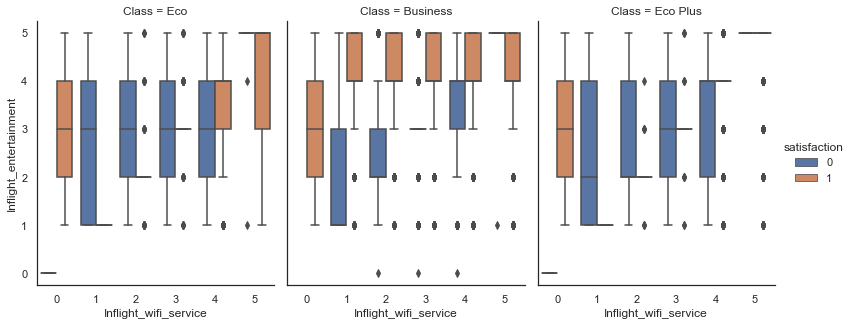

In [41]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=data, kind="box", height=4.5, aspect=.8)

* **Economy Class**: High level of inflight entertainment and wifi services make them satisfed for rating 3-5.
* **Business class** : Only high level of inflight entertainment make him satisfied.
* **Economy Plus** : only (rating 0) is satified with minimal level of inflight entertainment and inflight_wifi_services.

In [42]:
data.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

## Q: How seat comfort affect the satisfaction ?

In [43]:
data.Seat_comfort.unique()

array([5, 2, 1, 3, 4, 0], dtype=int64)

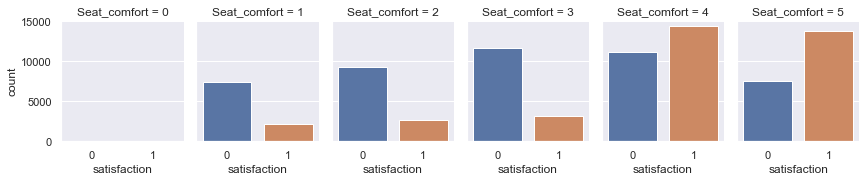

In [44]:
sns.axes_style(style='whitegrid')
g = sns.catplot('satisfaction',col='Seat_comfort',data= data,kind='count',col_wrap=6,height=2.5,aspect=.8)

**Seat_comfort help to increase level of satisfaction**

##  Satisfaction Vs Ease_of_Online_booking 

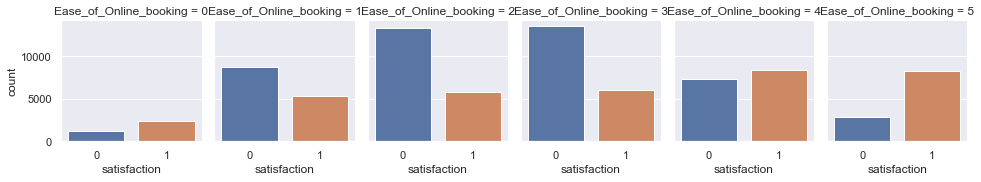

In [45]:
sns.axes_style(style='ticks')
g = sns.catplot('satisfaction',col='Ease_of_Online_booking',data= data,kind='count',col_wrap=6,height=2.5,aspect=.9)

## satisfaction vs Cleanliness

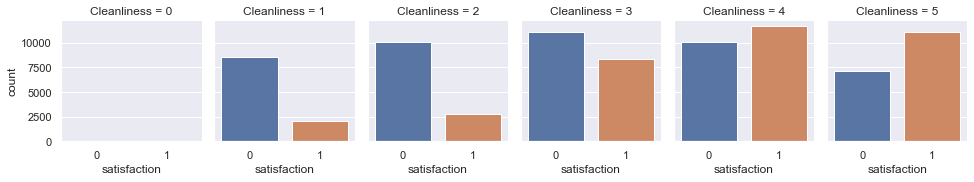

In [46]:
sns.axes_style(style='ticks')
g = sns.catplot('satisfaction',col='Cleanliness', data= data,kind='count',height = 2.5,aspect=0.9)

## Satisfaction vs Food_and_drink

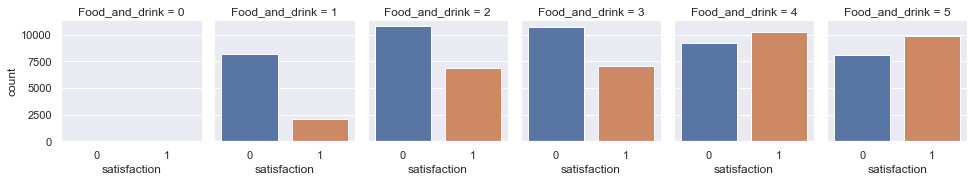

In [47]:
sns.axes_style(style='ticks')
g = sns.catplot('satisfaction',col='Food_and_drink', data= data,kind='count',height = 2.5,aspect=0.9)

# Label encoding for Categorical data

In [48]:
cat_col = data.select_dtypes(include =['object']).columns
cat_col

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [49]:
print('Gender Unique :',data['Gender'].unique())
print('Customer_Type Unique :',data['Customer_Type'].unique())
print('Type_of_Travel :',data['Type_of_Travel'].unique())
print('Class :',data['Class'].unique())

Gender Unique : ['Female' 'Male']
Customer_Type Unique : ['Loyal Customer' 'disloyal Customer']
Type_of_Travel : ['Personal Travel' 'Business travel']
Class : ['Eco' 'Business' 'Eco Plus']


In [50]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in cat_col:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])


In [51]:
data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,0,30,1,1,193,3,4,0,3,5,0,5,5,4,5,3,4,4,5,0,0.0,0
1,0,0,51,0,1,925,2,1,1,1,5,3,2,2,2,2,2,3,2,3,47,29.0,0
2,1,1,27,0,1,505,0,0,0,4,1,0,1,1,5,5,2,3,2,1,0,0.0,1
3,0,0,52,0,0,2953,2,2,2,2,3,4,5,5,5,5,5,4,5,5,10,2.0,1
4,0,1,15,0,1,1352,4,4,4,2,2,4,2,2,4,3,5,3,5,2,0,0.0,1


In [52]:
test_data.select_dtypes(include =['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [53]:
lencoders_t_data = {}
for col in test_data.select_dtypes(include =['object']).columns:
    lencoders_t_data[col] = LabelEncoder()
    test_data[col] = lencoders[col].fit_transform(test_data[col])

In [54]:
test_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,41,0,1,303,5,3,3,3,5,5,5,5,4,3,3,5,5,5,0,0.0
1,0,0,18,0,0,391,1,5,5,5,1,1,1,1,4,3,3,1,4,1,17,17.0
2,0,0,13,1,2,569,2,4,2,3,1,2,1,1,5,4,4,5,5,1,0,0.0
3,1,1,23,0,1,109,1,0,1,1,3,1,1,3,2,5,5,3,1,3,0,0.0
4,1,0,23,1,0,83,4,5,0,3,5,0,5,5,3,5,4,3,5,5,0,0.0


In [55]:
data.shape

(83123, 23)

<AxesSubplot:>

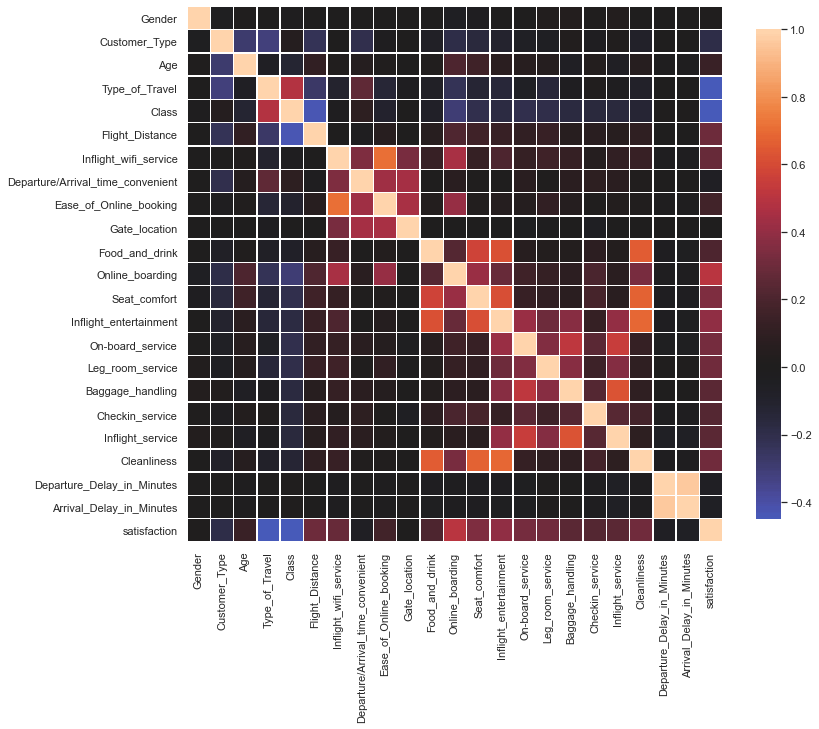

In [56]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),vmax=None, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .9})

In [57]:
data.shape

(83123, 23)

## Scaling of Data using min-max 

In [58]:
from sklearn.preprocessing import MinMaxScaler
r_scaler = MinMaxScaler() 
r_scaler.fit(data)
# modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(data), columns=data.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0.0,0.0,0.294872,1.0,0.5,0.032714,0.6,0.8,0.0,0.6,1.0,0.0,1.0,1.0,0.8,1.0,0.50,0.8,0.8,1.0,0.000000,0.000000,0.0
1,0.0,0.0,0.564103,0.0,0.5,0.180533,0.4,0.2,0.2,0.2,1.0,0.6,0.4,0.4,0.4,0.4,0.25,0.6,0.4,0.6,0.029523,0.018308,0.0
2,1.0,1.0,0.256410,0.0,0.5,0.095719,0.0,0.0,0.0,0.8,0.2,0.0,0.2,0.2,1.0,1.0,0.25,0.6,0.4,0.2,0.000000,0.000000,1.0
3,0.0,0.0,0.576923,0.0,0.0,0.590065,0.4,0.4,0.4,0.4,0.6,0.8,1.0,1.0,1.0,1.0,1.00,0.8,1.0,1.0,0.006281,0.001263,1.0
4,0.0,1.0,0.102564,0.0,0.5,0.266761,0.8,0.8,0.8,0.4,0.4,0.8,0.4,0.4,0.8,0.6,1.00,0.6,1.0,0.4,0.000000,0.000000,1.0


# Top 10 feature selection using SelectKBest ,chi2

In [59]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer_Type', 'Type_of_Travel', 'Class', 'Flight_Distance',
       'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service'],
      dtype='object')


## Feature Importance using Wrapper Method

In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
X = data.drop('satisfaction',axis=1)
y = data['satisfaction']
selector = SelectFromModel(rf(n_estimators=100,random_state=0))
selector.fit(X,y)
support =  selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
[0.00457132 0.03549722 0.03410921 0.1002397  0.08025638 0.03996004
 0.14761241 0.01691517 0.0395951  0.01693159 0.01287967 0.17556122
 0.05266678 0.05119175 0.03180223 0.0402824  0.0253328  0.02298803
 0.02290236 0.02515459 0.01099151 0.01255851]


# Feature Permutation importance

In [61]:
! pip install eli5

In [62]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1510 ± 0.0016,Inflight_wifi_service
0.1427 ± 0.0008,Type_of_Travel
0.0514 ± 0.0008,Customer_Type
0.0469 ± 0.0007,Online_boarding
0.0281 ± 0.0004,Checkin_service
0.0245 ± 0.0007,Class
0.0221 ± 0.0013,Seat_comfort
0.0206 ± 0.0012,Baggage_handling
0.0188 ± 0.0006,Inflight_service
0.0169 ± 0.0006,Cleanliness


Top 10 important features :
1. Inflight_wifi_service
2. Type_of_Travel
3. Customer_Type
4. Online_boarding
5. Checkin_service
6. Class
7. Seat_comfort
8. Baggage_handling
9. Inflight_service
10. Cleanliness

# Model Building

In [63]:
data.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [84]:
corr = data.corr(method='pearson',ascending= false)
print(corr)

Gender                               0.011790
Customer_Type                       -0.186386
Age                                  0.136977
Type_of_Travel                      -0.449418
Class                               -0.448042
Flight_Distance                      0.301113
Inflight_wifi_service                0.284496
Departure/Arrival_time_convenient   -0.052563
Ease_of_Online_booking               0.173212
Gate_location                        0.000922
Food_and_drink                       0.209106
Online_boarding                      0.504342
Seat_comfort                         0.344462
Inflight_entertainment               0.394550
On-board_service                     0.321413
Leg_room_service                     0.310589
Baggage_handling                     0.244468
Checkin_service                      0.233792
Inflight_service                     0.244100
Cleanliness                          0.303931
Departure_Delay_in_Minutes          -0.049321
Arrival_Delay_in_Minutes          

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             83123 non-null  int32  
 1   Customer_Type                      83123 non-null  int32  
 2   Age                                83123 non-null  int64  
 3   Type_of_Travel                     83123 non-null  int32  
 4   Class                              83123 non-null  int32  
 5   Flight_Distance                    83123 non-null  int64  
 6   Inflight_wifi_service              83123 non-null  int64  
 7   Departure/Arrival_time_convenient  83123 non-null  int64  
 8   Ease_of_Online_booking             83123 non-null  int64  
 9   Gate_location                      83123 non-null  int64  
 10  Food_and_drink                     83123 non-null  int64  
 11  Online_boarding                    83123 non-null  int

In [65]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']
X = data[features]
y = data[target]

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)


# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train cases as below
X_train shape:  (62342, 12)
y_train shape:  (62342, 1)

Test cases as below
X_test shape:  (20781, 12)
y_test shape:  (20781, 1)


## Model -1 ( Linear model implementation and Evaluation)

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# model Prediction
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

# make predictions on the testing set
print(y_pred_test)

probabilities = logreg.predict_proba(X_test)
probabilities_1 = probabilities[:,1]
probabilities_0 = probabilities[:,0]

# Model Evaluation using accuracy classification score
y_test
y_pred_test

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

# Model Evaluation using confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred_test)
print(conf_matrix)

c_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(c_matrix)


[0 0 0 ... 1 0 0]
Accuracy score for test data is: 0.8545305808190173
[[10333  1312]
 [ 1711  7425]]
       0     1
0  10333  1312
1   1711  7425


# Model -2 Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

In [67]:
import time
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt

def run_model(model,X_train,y_train,X_test,y_test,verbose = True):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train)
        
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    time_taken = time.time()-t0  # Check elapse time
    
    # Format of printing
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    
    plot_roc_curve(model, X_test, y_test)
    
    return model,accuracy, roc_auc, time_taken    

Accuracy = 0.8545305808190173
ROC Area under Curve = 0.8500262668824289
Time taken = 0.20900917053222656
              precision    recall  f1-score   support

           0    0.85794   0.88733   0.87239     11645
           1    0.84983   0.81272   0.83086      9136

    accuracy                        0.85453     20781
   macro avg    0.85389   0.85003   0.85163     20781
weighted avg    0.85437   0.85453   0.85413     20781



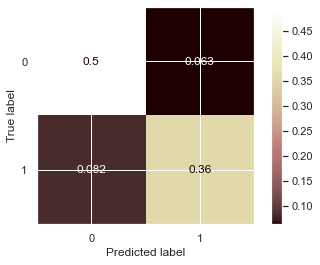

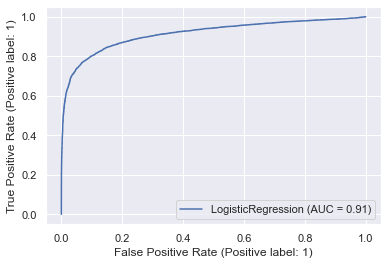

In [68]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [69]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.390040
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                62342
Model:                          Logit   Df Residuals:                    62330
Method:                           MLE   Df Model:                           11
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.4298
Time:                        15:19:27   Log-Likelihood:                -24316.
converged:                       True   LL-Null:                       -42648.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0064      0.013    -80.178      0.000      -1.031      -0.982
x2             0.1554      0.

# Model -2  Naive Bayes Classifier

Accuracy = 0.8523651412347818
ROC Area under Curve = 0.8483771070842848
Time taken = 0.11900615692138672
              precision    recall  f1-score   support

           0    0.85884   0.88141   0.86998     11645
           1    0.84360   0.81535   0.82923      9136

    accuracy                        0.85237     20781
   macro avg    0.85122   0.84838   0.84961     20781
weighted avg    0.85214   0.85237   0.85207     20781



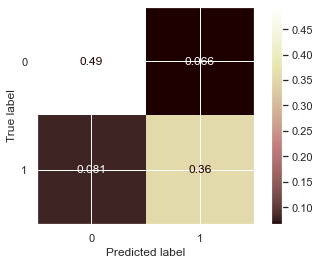

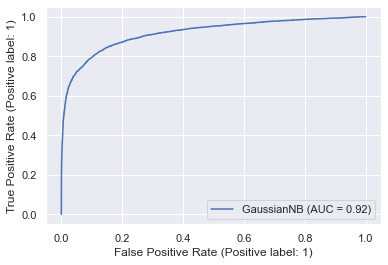

In [70]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

# Model-3 K Nearest Neighbour

Accuracy = 0.9221885376064675
ROC Area under Curve = 0.9151947311707482
Time taken = 11.901710510253906
              precision    recall  f1-score   support

           0    0.89680   0.97312   0.93340     11645
           1    0.96157   0.85727   0.90643      9136

    accuracy                        0.92219     20781
   macro avg    0.92919   0.91519   0.91992     20781
weighted avg    0.92528   0.92219   0.92155     20781



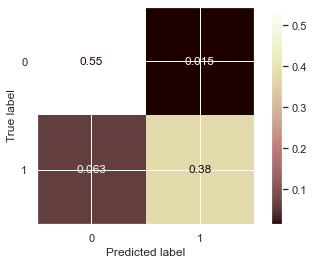

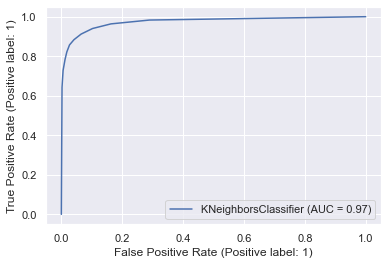

In [71]:
from sklearn.neighbors import KNeighborsClassifier
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}
model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

## Model- 4  Decision Tree classifiers

Accuracy = 0.926615658534238
ROC Area under Curve = 0.9233545483017374
Time taken = 0.25501513481140137
              precision    recall  f1-score   support

           0    0.92118   0.95036   0.93554     11645
           1    0.93407   0.89634   0.91482      9136

    accuracy                        0.92662     20781
   macro avg    0.92762   0.92335   0.92518     20781
weighted avg    0.92684   0.92662   0.92643     20781



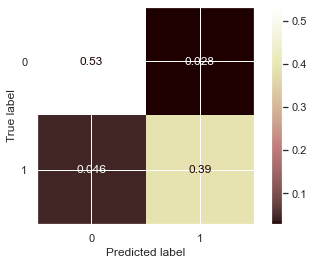

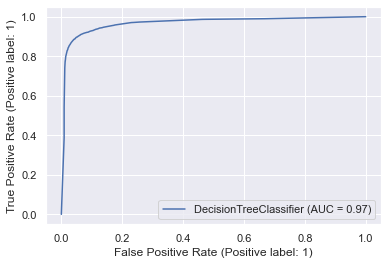

In [72]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,'max_features': "sqrt"}
model_dt = DecisionTreeClassifier(**params_dt)
model_dt,accuracy_dt,roc_auc_dt,tt_dt = run_model(model_dt,X_train,y_train,X_test,y_test)

# Model- 5 Random Forest Classifer

Accuracy = 0.9510129445166258
ROC Area under Curve = 0.9485431303243426
Time taken = 15.04190468788147
              precision    recall  f1-score   support

           0    0.94498   0.96900   0.95684     11645
           1    0.95916   0.92809   0.94337      9136

    accuracy                        0.95101     20781
   macro avg    0.95207   0.94854   0.95010     20781
weighted avg    0.95121   0.95101   0.95092     20781



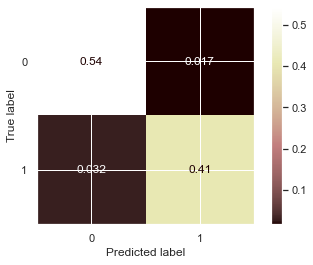

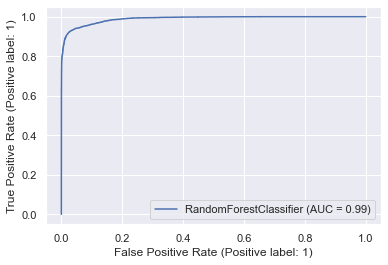

In [73]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,'min_samples_leaf': 1,'min_samples_split': 2,'n_estimators': 100,'random_state': 12345}
model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)


In [74]:
# Instantiate Random Forest classifier
clf_rf = {'max_depth': 16,'min_samples_leaf': 1,'min_samples_split': 2,'n_estimators': 100,'random_state': 12345}
clf_rf = RandomForestClassifier(**params_rf)
clf_rf.fit(X_train, y_train)

# Predicting training
y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

print(y_pred_test)

# Model Evaluation for storing for y_test,y_pred_test
from sklearn.metrics import accuracy_score

rf_model_acc = accuracy_score(y_test,y_pred_test)
print('Accuracy score for test data is:', rf_model_acc)

# Model Evaluation using confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred_test)
print(conf_matrix)

c_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(c_matrix)

[0 0 0 ... 1 0 0]
Accuracy score for test data is: 0.9510129445166258
[[11284   361]
 [  657  8479]]
       0     1
0  11284   361
1    657  8479


In [75]:
print(type(y_pred_test))

<class 'numpy.ndarray'>


In [76]:
pd.DataFrame(y_pred_test).to_csv('submission.csv',index = False, header = False)

we see that Random Forest has performed very well on both Accuracy and area under ROC curve. So, we are now interested to see **how many decision trees are minimally required make the Accuarcy consistent** (recalling the fact that Random Forest is actually a bagged ensemble of decision trees).

# Model-6 Extereme gradient boosting

[15:20:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.9448053510418171
ROC Area under Curve = 0.9429688974545422
Time taken = 72.3893609046936
              precision    recall  f1-score   support

           0    0.94415   0.95818   0.95111     11645
           1    0.94567   0.92776   0.93663      9136

    accuracy                        0.94481     20781
   macro avg    0.94491   0.94297   0.94387     20781
weighted avg    0.94482   0.94481   0.94475     20781



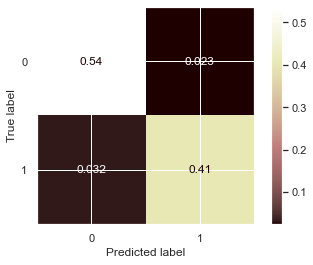

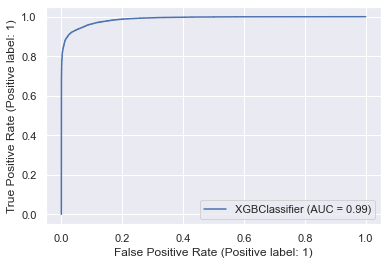

In [77]:
import xgboost as xgb

params_xgb = {'n_estimators':500,'max_depth': 16}
model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

# Model-7 Adaptive gradient boosting

Accuracy = 0.9167989990857033
ROC Area under Curve = 0.9144067575961061
Time taken = 59.58958172798157
              precision    recall  f1-score   support

           0    0.91868   0.93422   0.92638     11645
           1    0.91431   0.89459   0.90434      9136

    accuracy                        0.91680     20781
   macro avg    0.91649   0.91441   0.91536     20781
weighted avg    0.91676   0.91680   0.91669     20781



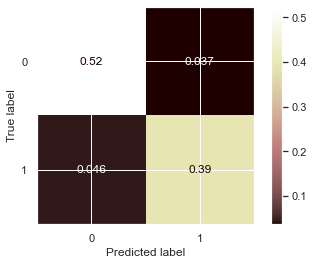

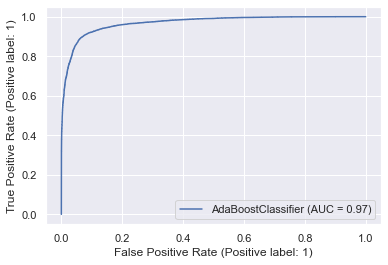

In [78]:
from sklearn.ensemble import AdaBoostClassifier as adab
params_adab = {'n_estimators':500,'random_state':0}

model_adab = adab(**params_adab)
model_adab,accuracy_adab,roc_auc_adab,tt_adab = run_model(model_adab,X_train,y_train,X_test,y_test)

# Decision Region Plotting for Different Models

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
! pip install mlxtend

[15:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


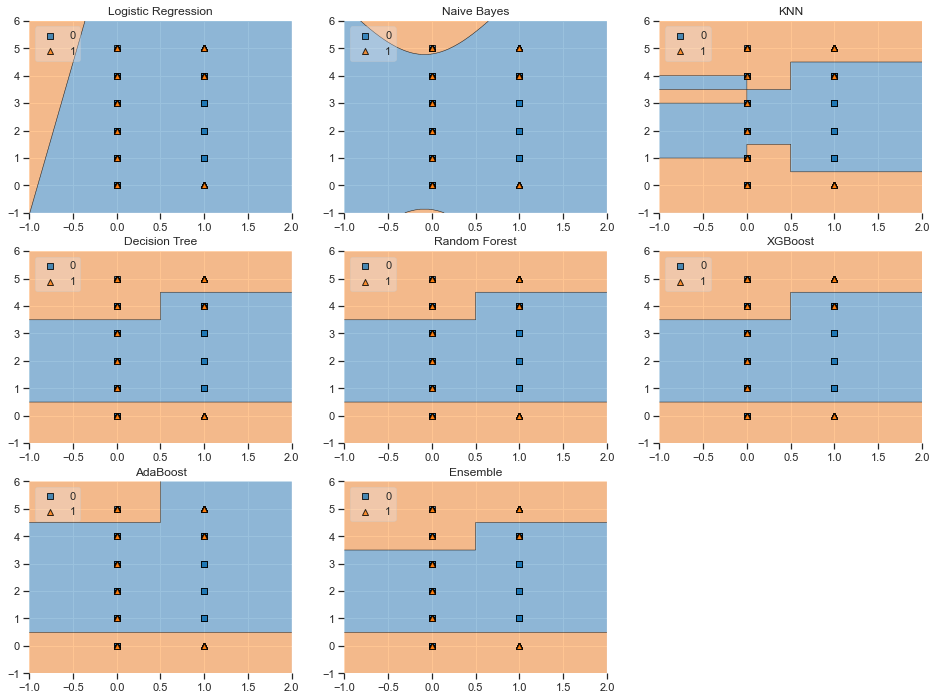

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345) 
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

X_list = data[["Type_of_Travel", "Inflight_wifi_service", "Online_boarding", "Seat_comfort"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = data["satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(16, 12))

labels = ['Logistic Regression',
          'Naive Bayes',
          'KNN',
          'Decision Tree',
          'Random Forest',
          'XGBoost',
          'AdaBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4,clf6, clf7, clf8, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value, 3: value}, 
                                filler_feature_ranges={2: width, 3: width}, 
                                legend=2)
    plt.title(lab)

plt.show()


# Model Comparison

In [82]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt,roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt,tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
model_com_data = pd.DataFrame(model_data)
model_com_data.head()

,Model,ROC_AUC,Time taken
0,Logistic Regression,0.850026,0.209009
1,Naive Bayes,0.848377,0.119006
2,K-NN,0.915195,11.901711
3,Decision Tree,0.923355,0.255015
4,Random Forest,0.948543,15.041905


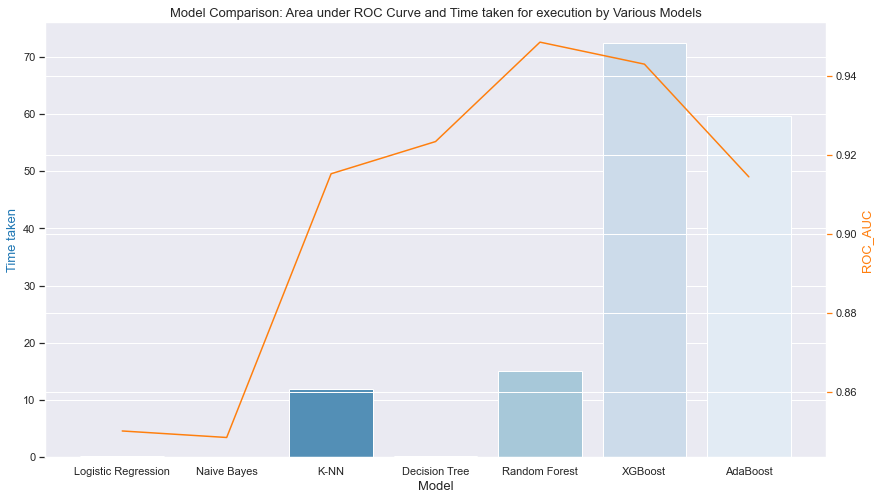

In [83]:
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = model_com_data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = model_com_data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

# Conclusion

 The model accuracy for Random Forest is 95% and time consuming less hence this is our the best Model.

# The End